Homework3 Name: Jingyue Zhang Student ID:7529916982 Github username：jingyuezzz

1.（b）split to test and train set


In [478]:
import pandas as pd
import os
import re
from sklearn.utils import resample
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt

In [479]:
data_dir = '../data/AReM/'
activity1 = ['bending1', 'bending2']
activity2 = ['cycling', 'lying', 'sitting','standing','walking' ]

In [480]:
test_set = pd.DataFrame()
train_set = pd.DataFrame()
column_list = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
instance_dict = {} 
n=1

for activity in activity1:
    path = data_dir+activity
    for files in os.listdir(path):
        if int(re.findall('\d+', files)[0])<=2:
            activity_df = pd.read_csv(path+'/'+files, skiprows=5, header=None, names=column_list)
            activity_df['activity']=activity
            test_set = pd.concat([test_set, activity_df])
        if int(re.findall('\d+', files)[0])>2:
            if int(re.findall('\d+', files)[0])==4 and activity == 'bending2':
                activity_df = pd.read_csv(path+'/'+files, skiprows=5, header=None, names=column_list,sep =' ',index_col = False)
            else: 
                activity_df = pd.read_csv(path+'/'+files, skiprows=5, header=None, names=column_list)
            activity_df['activity']=activity 
            train_set = pd.concat([train_set, activity_df])
        instance_dict[n] = activity_df
        n+=1



for activity in activity2:
    path = data_dir+activity
    for files in os.listdir(path):
        activity_df = pd.read_csv(path+'/'+files, skiprows=5, header=None, names=column_list,on_bad_lines='skip')
        activity_df['activity']=activity
        if int(re.findall('\d+', files)[0])<=3:
            test_set = pd.concat([test_set, activity_df])
        if int(re.findall('\d+', files)[0])>3:
            train_set = pd.concat([train_set, activity_df])
        instance_dict[n] = activity_df
        n+=1

        


1.(c)i
Research what types of time-domain features are usually used in time series classification and list them
        

answer: mean, standard deviation, skewness, maximum, minimum,frequencies of peak,kth quartile

(c)ii

In [495]:

des_list = {}
for i in range(1,89,1):
    a=[]
    for column in column_list[1:]:
        des = instance_dict[i][column].describe().drop(columns = '# Columns: time')
        des_col_list = [des['min'],des['max'],des['mean'],des['50%'],des['std'],des['25%'],des['75%']]
        a += des_col_list
    a.append(instance_dict[i]['activity'][0])
    des_list[i]=a

feature_table = pd.DataFrame(des_list).T
feature = ['min','max','mean','median','std','1stquart', '3rdquart']
feature_six = []
n = 1
while n<=6:
    for f in feature:
        newfeature = f+str(n)
        feature_six.append(newfeature)
    n+=1

feature_six.append('label')
feature_table.columns = feature_six
feature_table





,min1,max1,mean1,median1,std1,1stquart1,3rdquart1,min2,max2,mean2,...,1stquart5,3rdquart5,min6,max6,mean6,median6,std6,1stquart6,3rdquart6,label
1,36.25,48.0,43.969125,44.5,1.618364,43.31,44.67,0.0,1.5,0.413125,...,20.5,23.75,0.0,2.96,0.555313,0.49,0.487826,0.0,0.83,bending1
2,37.0,48.0,43.454958,43.25,1.386098,42.5,45.0,0.0,1.58,0.378083,...,22.25,24.0,0.0,5.26,0.679646,0.5,0.622534,0.43,0.87,bending1
3,33.0,47.75,42.179813,43.5,3.670666,39.15,45.0,0.0,3.0,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.5,0.524317,0.0,1.0,bending1
4,33.0,45.75,41.678063,41.75,2.24349,41.33,42.75,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.5,bending1
5,37.25,45.0,40.624792,40.5,1.476967,39.25,42.0,0.0,1.3,0.358604,...,33.0,36.0,0.0,1.92,0.570583,0.43,0.582915,0.0,1.3,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.75,45.5,34.32275,35.25,4.752477,31.0,38.0,0.0,13.47,4.456333,...,13.5,17.75,0.0,9.67,3.432562,3.2,1.732727,2.1575,4.565,walking
85,19.25,44.0,34.473188,35.0,4.796705,31.25,38.0,0.0,13.86,4.359312,...,13.73,17.75,0.43,9.0,3.340458,3.09,1.699114,2.12,4.375,walking
86,23.5,46.25,34.873229,35.25,4.53172,31.75,38.25,0.0,14.82,4.380583,...,13.75,18.0,0.0,9.51,3.424646,3.27,1.69096,2.17,4.5,walking
87,18.33,45.75,34.599875,35.125,4.73179,31.5,38.0,0.0,15.37,4.398833,...,14.0,18.25,0.0,8.86,3.289542,3.015,1.68017,2.12,4.26,walking


(c)iii

In [496]:
#standard deviation 
feature_table.std()

min1         9.569975
max1         4.394362
mean1        5.335700
median1      5.440054
std1         1.772185
1stquart1    6.153874
3rdquart1    5.138925
min2         0.000000
max2         5.062729
mean2        1.574198
median2      1.412293
std2         0.884137
1stquart2    0.946386
3rdquart2    2.125399
min3         2.956462
max3         4.875137
mean3        4.008228
median3      4.036396
std3         0.946670
1stquart3    4.220658
3rdquart3    4.171628
min4         0.000000
max4         2.183625
mean4        1.166178
median4      1.145985
std4         0.458283
1stquart4    0.843405
3rdquart4    1.552504
min5         6.124001
max5         5.741238
mean5        5.675543
median5      5.813782
std5         1.024918
1stquart5    6.096465
3rdquart5    5.531720
min6         0.045838
max6         2.518921
mean6        1.154889
median6      1.086474
std6         0.517651
1stquart6    0.758687
3rdquart6    1.523739
dtype: float64

In [497]:
#90% bootsrap confidence interval
data = feature_table.drop(columns = ['label'])
resample_res =pd.DataFrame(columns = list(data.columns))
for i in range(1,1000,1):
    resample_data = resample(data, replace=True, n_samples=data.shape[0])
    resample_std = resample_data.apply(np.std, ddof=1, axis = 0)
    resample_res = resample_res.append(resample_std,ignore_index=True)
con_interval = resample_res.apply(np.percentile, args=([5,95],), axis = 0)
conin_table = {}
conin = ''
for col in list(data.columns):
    conin = str(round(con_interval.loc[0,col], 2))+','+str(round(con_interval.loc[1,col],2))
    conin_table[col] =  conin
interval_table = pd.DataFrame(conin_table,index=[0]).T
interval_table


,0
min1,"8.2,10.7"
max1,"3.32,5.34"
mean1,"4.7,5.87"
median1,"4.77,5.98"
std1,"1.56,1.95"
1stquart1,"5.58,6.63"
3rdquart1,"4.33,5.85"
min2,"0.0,0.0"
max2,"4.63,5.4"
mean2,"1.41,1.71"


(c)iv

In [498]:
train_bending1 = feature_table
train_bending1['label']=train_bending1['label'].replace('bending1',1)
train_bending1.loc[train_bending1['label'] != 1, 'label'] = 0
train_bending1

,min1,max1,mean1,median1,std1,1stquart1,3rdquart1,min2,max2,mean2,...,1stquart5,3rdquart5,min6,max6,mean6,median6,std6,1stquart6,3rdquart6,label
1,36.25,48.0,43.969125,44.5,1.618364,43.31,44.67,0.0,1.5,0.413125,...,20.5,23.75,0.0,2.96,0.555313,0.49,0.487826,0.0,0.83,1
2,37.0,48.0,43.454958,43.25,1.386098,42.5,45.0,0.0,1.58,0.378083,...,22.25,24.0,0.0,5.26,0.679646,0.5,0.622534,0.43,0.87,1
3,33.0,47.75,42.179813,43.5,3.670666,39.15,45.0,0.0,3.0,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.5,0.524317,0.0,1.0,1
4,33.0,45.75,41.678063,41.75,2.24349,41.33,42.75,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.5,1
5,37.25,45.0,40.624792,40.5,1.476967,39.25,42.0,0.0,1.3,0.358604,...,33.0,36.0,0.0,1.92,0.570583,0.43,0.582915,0.0,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.75,45.5,34.32275,35.25,4.752477,31.0,38.0,0.0,13.47,4.456333,...,13.5,17.75,0.0,9.67,3.432562,3.2,1.732727,2.1575,4.565,0
85,19.25,44.0,34.473188,35.0,4.796705,31.25,38.0,0.0,13.86,4.359312,...,13.73,17.75,0.43,9.0,3.340458,3.09,1.699114,2.12,4.375,0
86,23.5,46.25,34.873229,35.25,4.53172,31.75,38.25,0.0,14.82,4.380583,...,13.75,18.0,0.0,9.51,3.424646,3.27,1.69096,2.17,4.5,0
87,18.33,45.75,34.599875,35.125,4.73179,31.5,38.0,0.0,15.37,4.398833,...,14.0,18.25,0.0,8.86,3.289542,3.015,1.68017,2.12,4.26,0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance

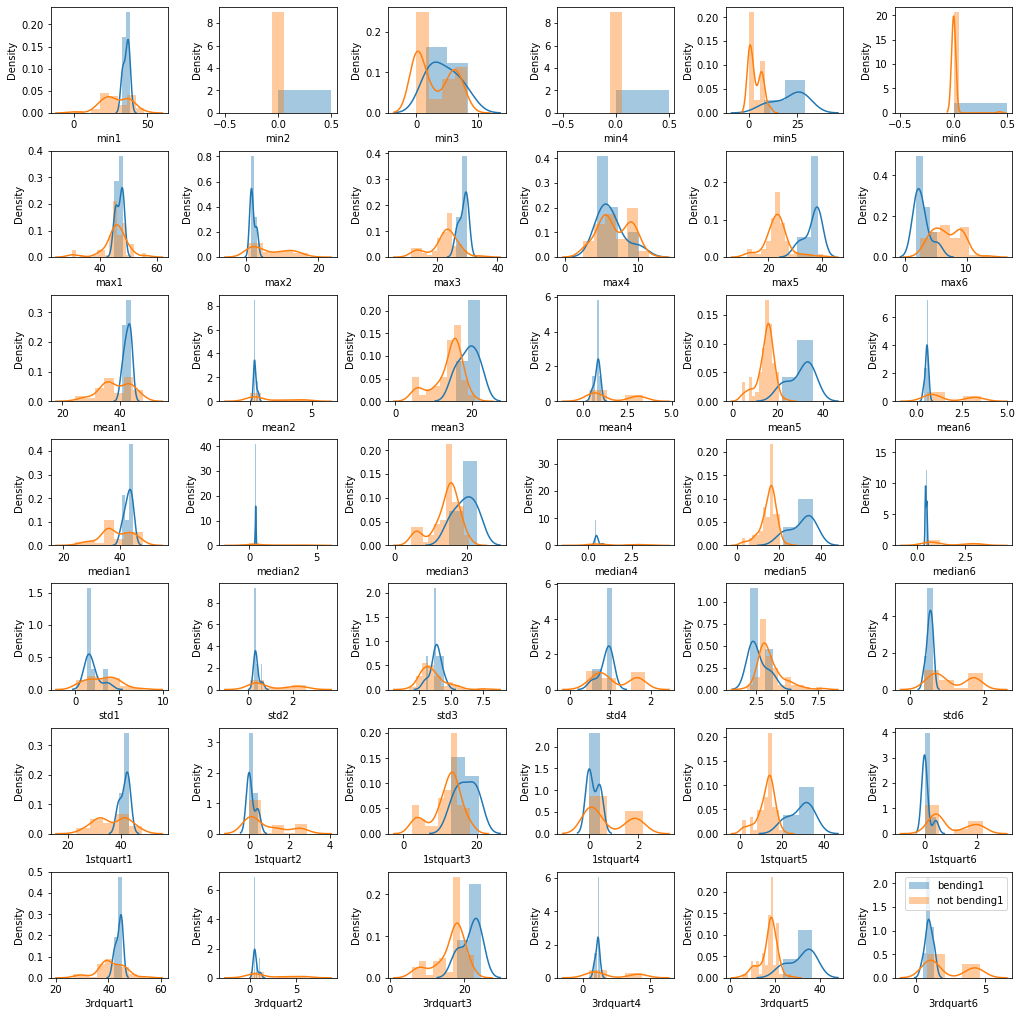

In [499]:
fig, axes = plt.subplots(7, 6, figsize=(14, 14))
for j, f in enumerate(feature, start = 1):
    for i in range(1,7): 
        plt.subplot(7,6,6*j+i-6)
        sns.distplot(train_bending1.loc[train_bending1['label'] == 1][f+str(i)],label = 'bending1')
        sns.distplot(train_bending1.loc[train_bending1['label'] == 0][f+str(i)],label='not bending1')
plt.legend()
fig.tight_layout(pad=0.3)
plt.show()

The three most important time-domain features are max,mean and standard deviation.The distributions of "bending1" and "not bending1" are significantly different for those three features. 

2.ISLR3.7.4
4.
I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.
(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
(b) Answer (a) using test rather than training RSS.
(c) SupposethatthetruerelationshipbetweenXandYisnotlinear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
(d) Answer (c) using test rather than training RSS.


(a) The cubic regression will fit better and have a lower training RSS than the linear regression, because it could make a tighter fit against data.

(b)The linear regression will fit better, and cubic regression could have a higher test RSS because cubic regression  overfit from training and will have more error.

(c)The trainning RSS will be smaller for cubic regression because it is more flexible.

(d)It depends on the true distribution of x and y, we don't have enough information to make a conclusion.